<a href="https://colab.research.google.com/github/Anshuman776/Deep-Learning-Projects-/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense , Dropout , Flatten
from keras.models import Sequential
# Dropout Regularization : To get rid of overfitting problem
from keras.layers import Conv2D , MaxPooling2D
from keras import backend as k

i already know that there are 10 classes

In [22]:
# number of class - do not change unless the data changes
num_classes = 10

In [23]:
# size of batches and # of epochs of data
batch_size = 64
epochs = 24

i have don 28*28 as per requriment it can be changed


In [24]:
#  input image dimensions
img_rows , img_cols = 28 , 28

In [25]:
# the data , shuffled and split between train and test sets
(x_train, y_train),(x_test , y_test) = fashion_mnist.load_data()

In [26]:
x_train.shape

(60000, 28, 28)

In [27]:
x_test.shape

(10000, 28, 28)

In [28]:
len(y_train)

60000

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
x_train.shape[0]

60000

In [31]:
x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)

In [32]:
input_shape

(28, 28, 1)

our input shape is now set to 28 * 28 * 1 which is reshaped it is image that we need to upload in the dataset

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
# type convert and scale the test and training data

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:',x_train.shape)
print('x_test shape:', x_test.shape)
print(y_train[0:3])

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
[9 0 0]


we can say that we are scaling down the feature technique

In [35]:
#  convert class vectors to binary class matrices. one-hot encoding
# 3 => 0 0 0 1 0 0 0 0 0 0 and 1 => 0 1 0 0 0 0 0 0 0 0
y_train = tf.keras.utils.to_categorical(y_train , num_classes)
y_test = tf.keras.utils.to_categorical(y_test , num_classes)
print(y_train[0:2]) # verify one-hot encoding

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


**CNN Code**

In [36]:
# Define the model
model = Sequential()

In [37]:
num_classes

10

In [38]:
# Create a  cnn to classify the images
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
# mode.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


* in first line 32 is feature detector it can be many more
* the dense layer is 128 layers and the 64 layers

In [39]:
# Define compile to minimize categorical loss , use ada delta optimized , and optimized to maximizing accuracy
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# Train the model and test/validate the mode with the test data after each cycle (epoch) through the training data
# Return history of loss and accuracy for each epoch
hist = model.fit(x_train,y_train,batch_size = batch_size , epochs=epochs,verbose=1,validation_data=(x_test,y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.7229 - loss: 0.7579 - val_accuracy: 0.8546 - val_loss: 0.4013
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 60ms/step - accuracy: 0.8720 - loss: 0.3555 - val_accuracy: 0.8757 - val_loss: 0.3418
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.8884 - loss: 0.3050 - val_accuracy: 0.8850 - val_loss: 0.3236
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9012 - loss: 0.2693 - val_accuracy: 0.8921 - val_loss: 0.2980
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9073 - loss: 0.2497 - val_accuracy: 0.8972 - val_loss: 0.2905
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9139 - loss: 0.2323 - val_accuracy: 0.9022 - val_loss: 0.2727
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9225 - loss: 0.2068 - val_accuracy: 0.8967 - val_loss: 0.2884
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9244 - loss: 0.1995 - 

* categorical_crossentropy is used to for multi class classification and can be canged for binary class
* in above we are using softmax because it is a multi class where as if it is binary sigmoid function is used
* we are using adam optimizer we can use different

Test loss: 0.4213566780090332
Test accuracy: 0.9036999940872192


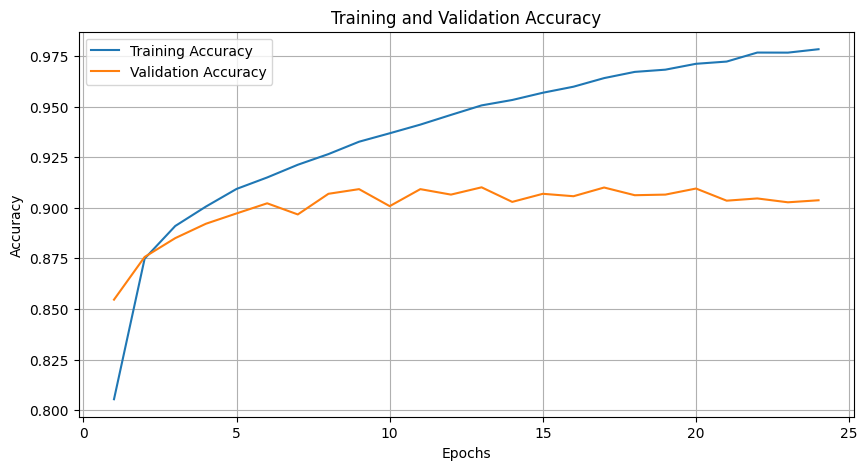

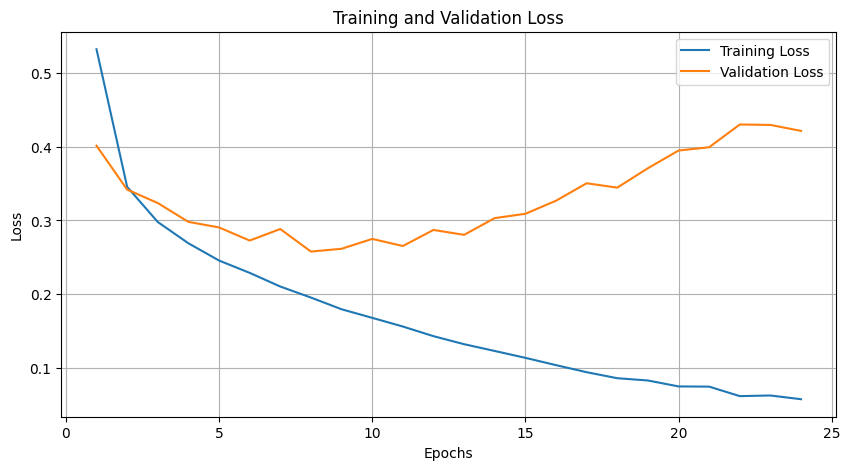

In [43]:
# Evaluate the model with the test data to get the score on 'real' data
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

# plot data to see relationships in trainig and validation data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
epoch_list = list(range(1,len(hist.history['accuracy'])+1)) # values for x axis [1,2,....]

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, hist.history['accuracy'], label='Training Accuracy')
plt.plot(epoch_list, hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, hist.history['loss'], label='Training Loss')
plt.plot(epoch_list, hist.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)

**How we have to find parameter**
Parameter in conv layer:
((shape of width of filter * shape of height filter * number of filter in the previous layer +1)* number of filters)

parameter in fc layers
((current layer c * previous layer p)+ 1 * c)